In [1]:
from Nozzle_1D import Nozzle
import matplotlib.pyplot as plt
import numpy as np
import pickle

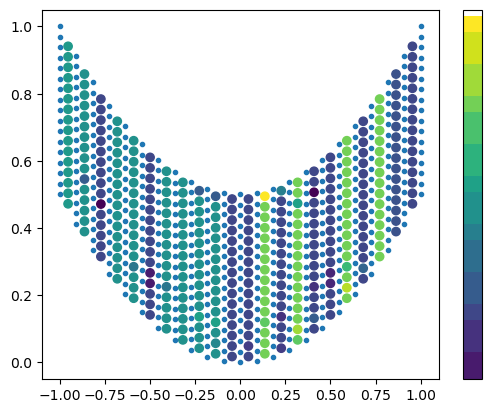

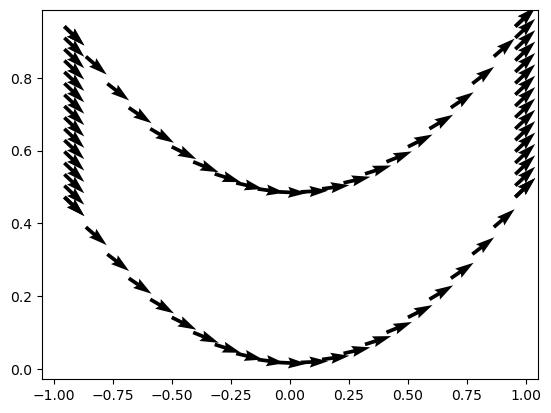

In [25]:
TestNozzle = Nozzle("inputs/Medium_inputs.nml")
TestNozzle.set_arrays()
TestNozzle.set_curved_geometry()
TestNozzle.plot_Geometry()
TestNozzle.set_normals()
TestNozzle.set_initial_conditions()

TestNozzle.compute_all_areas(visualize=True)
#TestNozzle.set_boundary_conditions()
#TestNozzle.nx_ny_right[0].shape
#plt.scatter(TestNozzle.V[:,:,3])
#TestNozzle.plot_primitive(type_="velocity")
TestNozzle.set_boundary_conditions()
TestNozzle.plot_boundary_primitive(type_="velocity")



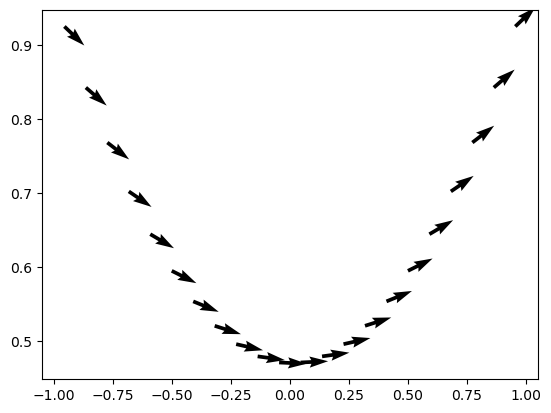

In [3]:
plt.quiver(TestNozzle.upward_S[0,-2,:],TestNozzle.upward_S[1,-2,:],TestNozzle.upward_S[2,-2,:],TestNozzle.upward_S[3,-2,:])

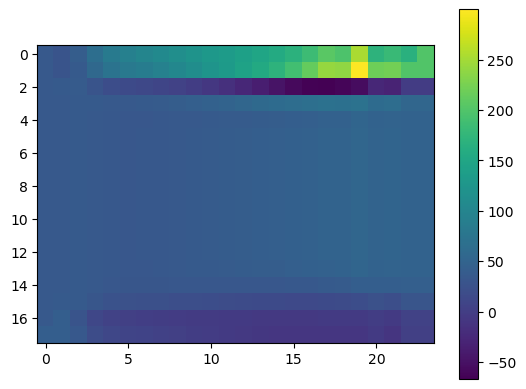

In [33]:

for i in range(1):
    TestNozzle.set_boundary_conditions()
    s = TestNozzle.iteration_step(return_error=True)
    TestNozzle.set_boundary_conditions()
    #print(np.linalg.norm(s[:,:,0]),npsd.linalg.norm(s[:,:,1]),np.linalg.norm(s[:,:,2]),np.linalg.norm(s[:,:,3]))
plt.imshow(TestNozzle.V[:,:,1])
plt.colorbar()

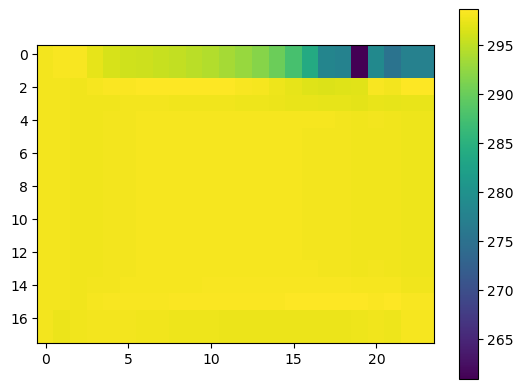

In [34]:
plt.imshow(TestNozzle.V[:,:,3])
plt.colorbar()

In [7]:
A_left = (TestNozzle.A_left)[:,:,np.newaxis]@(np.ones((1,4)))
A_right = (TestNozzle.A_right)[:,:,np.newaxis]@(np.ones((1,4)))
A_top = (TestNozzle.A_top)[:,:,np.newaxis]@(np.ones((1,4)))
A_bottom = (TestNozzle.A_bottom)[:,:,np.newaxis]@(np.ones((1,4)))

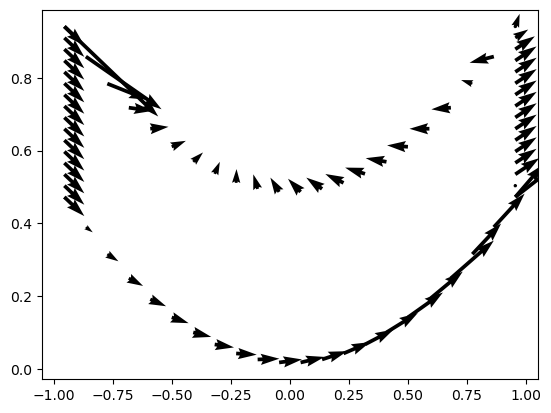

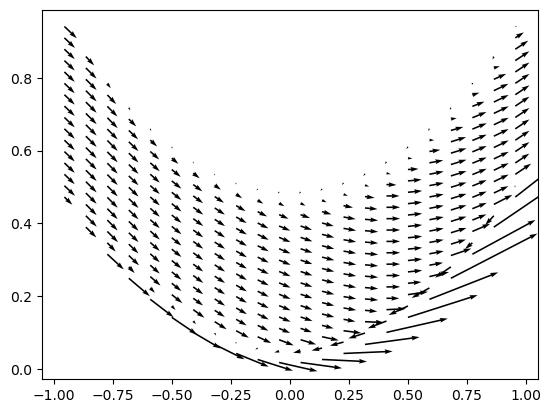

In [35]:
TestNozzle.plot_boundary_primitive("velocity")
TestNozzle.plot_primitive("velocity")


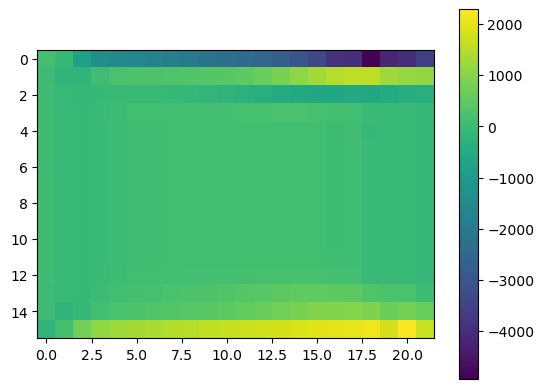

In [36]:
plt.imshow((TestNozzle.F_left*A_left + TestNozzle.F_right*A_right+TestNozzle.F_top*A_top+TestNozzle.F_bottom*A_bottom)[:,:,3])
plt.colorbar()

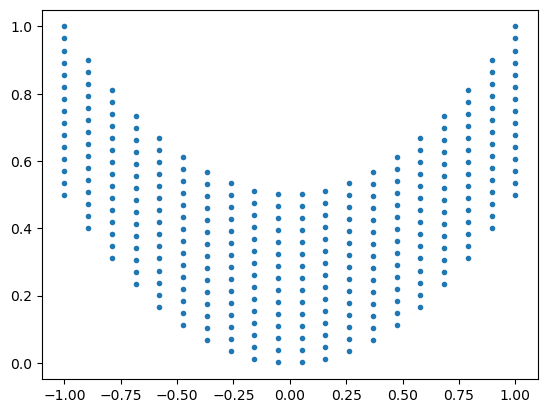

In [10]:
# top will always be (i = -1, j = -1:1)
x = np.linspace(-1,1,20) # NJ
y = np.linspace(0,1,15) # NI
xx_,yy_ = np.meshgrid(x,y)

xx = (xx_)
yy = .5*(yy_+xx**2)
plt.plot(xx.flatten(), yy.flatten(), ".")

A_top_bottom = np.sqrt((xx[:,1:]-xx[:,0:-1])**2+(yy[:,1:]-yy[:,0:-1])**2)
xx_top_bottom = (xx[:,1:]+xx[:,0:-1])/2
yy_top_bottom = (yy[:,1:]+yy[:,0:-1])/2
nxi_top = -(yy[:,1:]-yy[:,0:-1])
nyi_top = xx[:,1:]-xx[:,0:-1]



A_left_right = np.sqrt((xx[1:,:]-xx[0:-1,:])**2+(yy[1:,:]-yy[0:-1,:])**2)
xx_left_right = ((xx[1:,:]+xx[0:-1,:])/2)
yy_left_right = ((yy[1:,:]+yy[0:-1,:])/2)
nxi_left_right = -(yy[1:,:]-yy[0:-1,:])
nyi_left_right = (xx[1:,:]-xx[0:-1,:])


downward_normal = np.array([xx_top_bottom[0:-1,:],yy_top_bottom[0:-1,:],-(nxi_top/A_top_bottom)[0:-1,:],-(nyi_top/A_top_bottom)[0:-1,:]])
upward_normal = np.array([xx_top_bottom[1:,:],yy_top_bottom[1:,:],(nxi_top/A_top_bottom)[1:,:],(nyi_top/A_top_bottom)[1:,:]])
leftward_normal = np.array([xx_left_right[:,0:-1],yy_left_right[:,0:-1],(nxi_left_right/A_left_right)[:,0:-1],(nyi_left_right/A_left_right)[:,0:-1]])
rightward_normal = np.array([xx_left_right[:,1:],yy_left_right[:,1:],-(nxi_left_right/A_left_right)[:,1:],-(nyi_left_right/A_left_right)[:,1:]])

downward_S = np.array([xx_top_bottom[0:-1,:],yy_top_bottom[0:-1,:],-downward_normal[3],downward_normal[2]])
upward_S = np.array([xx_top_bottom[1:,:],yy_top_bottom[1:,:],upward_normal[3],-upward_normal[2]])
leftward_S = np.array([xx_left_right[:,0:-1],yy_left_right[:,0:-1],leftward_normal[3],-leftward_normal[2]])
rightward_S = np.array([xx_left_right[:,1:],yy_left_right[:,1:],-rightward_normal[3],rightward_normal[2]])


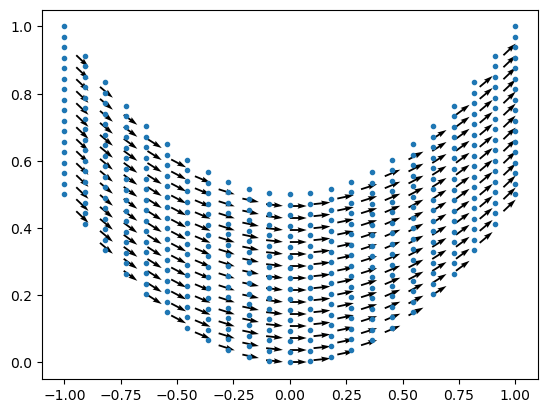

In [11]:


TestNozzle.V[-2,1:-1,1]
#plt.quiver(upward_normal[0,-1,:],upward_normal[1,-1,:],TestNozzle.V[-2,1:-1,1],TestNozzle.V[-2,1:-1,2])
#plt.quiver(downward_S[0,-1,:],downward_S[1,-1,:],TestNozzle.V[-1,1:-1,1],TestNozzle.V[-1,1:-1,2])
plt.quiver(downward_S[0],downward_S[1],downward_S[2],downward_S[3])
TestNozzle.plot_Geometry()
#plt.quiver(rightward_normal[0],rightward_normal[1],rightward_normal[2],rightward_normal[3])
#plt.quiver(xx_top_bottom,yy_top_bottom,(nxi_top/A_top_bottom),(nyi_top/A_top_bottom))
#plt.quiver(xx_top_bottom[-1,:],yy_top_bottom[-1,:],-(nxi_top/A_top_bottom)[-1,:],-(nyi_top/A_top_bottom)[-1,:])
#plt.quiver(xx_left_right,yy_left_right,-(nxi_left_right/A_left_right),-(nyi_left_right/A_left_right))
#nx_ny_right = [nxi_top/A_top_bottom,nyi_top/A_top_bottom]
#nx_ny_left = [-nxi_top/A_top_bottom,-nyi_top/A_top_bottom]
#nx_ny_up = [nxi_left_right/A_left_right,nyi_left_right/A_left_right]
nx_ny_down = [-nxi_left_right/A_left_right,-nyi_left_right/A_left_right]


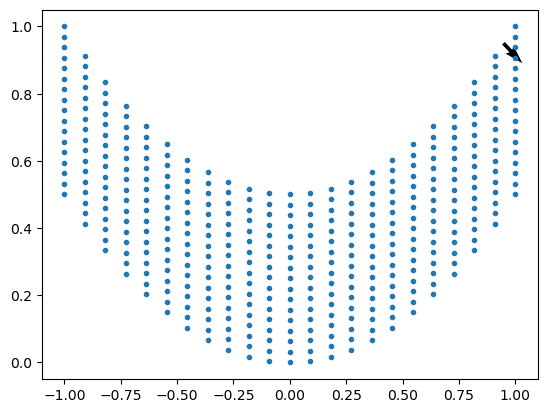

In [12]:
TestNozzle.plot_Geometry()
plt.quiver(xx_top_bottom[-1,-1],yy_top_bottom[-1,-1],-(nxi_top/A_top_bottom)[-1,-1],-(nyi_top/A_top_bottom)[-1,-1])

In [13]:
xx_.shape

(15, 20)

In [14]:
def compute_slip_walls(s1,s2,n1,n2,v2x,v2y):
    # Compute dot products
    dot_vs = v2x * s1 + v2y * s2
    dot_vn = v2x * n1 + v2y * n2

    # Determinant of A
    detA = s1 * n2 - s2 * n1

    # Inverse of A (analytical)
    A_inv = (1 / detA) * np.array([
        [ n2, -s2],
        [-n1,  s1]
    ])

    # Right-hand side
    rhs = np.array([dot_vs, -dot_vn])
    
    v1 = np.einsum("ijk,jk->ik",A_inv,rhs)
    A = np.array([
        [s1, s2],
        [n1, n2]
    ])
    print(np.einsum("ijk,jk->ik",A,v1)-rhs)
    return v1

In [15]:
index = [0,1,2,3]
x_top,y_top = compute_slip_walls(upward_S[2,-1,:],upward_S[3,-1,:],upward_normal[2,-1,:],\
                              upward_normal[3,-1,:],np.ones_like(upward_normal[2,-1,:]),np.ones_like(upward_normal[2,-1,:]))



[[ 1.11022302e-16  1.11022302e-16  0.00000000e+00 -5.55111512e-17
  -1.66533454e-16 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  -1.11022302e-16  0.00000000e+00  4.44089210e-16  0.00000000e+00
   2.22044605e-16  0.00000000e+00  2.22044605e-16  2.22044605e-16
   2.22044605e-16  4.44089210e-16  0.00000000e+00]
 [-4.44089210e-16  0.00000000e+00  0.00000000e+00  2.22044605e-16
   0.00000000e+00  0.00000000e+00  2.22044605e-16  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  -1.11022302e-16  0.00000000e+00 -1.11022302e-16 -5.55111512e-17
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [16]:

s1, s2 = 1, 2
n1, n2 = 3, 4

A = np.array([
    [s1, s2],
    [n1, n2]
])

detA = s1 * n2 - s2 * n1

A_inv = (1 / detA) * np.array([
    [ n2, -s2],
    [-n1,  s1]
])

print("A:")
print(A)
print("Computed inverse:")
print(A_inv)
print("Check A @ A_inv:")
print(A @ A_inv)

A:
[[1 2]
 [3 4]]
Computed inverse:
[[-2.   1. ]
 [ 1.5 -0.5]]
Check A @ A_inv:
[[1. 0.]
 [0. 1.]]


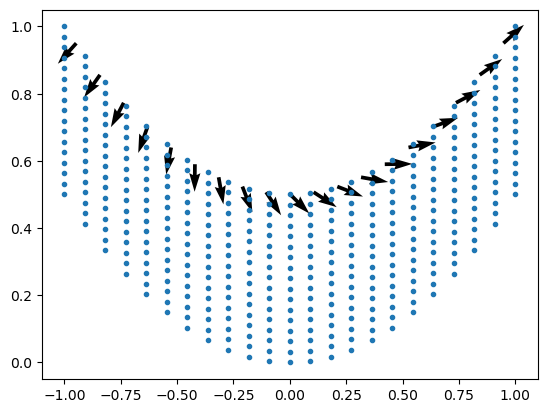

In [17]:
plt.quiver(upward_S[0,-1,:],upward_S[1,-1,:],x_top,y_top)
#plt.quiver(upward_S[0,-1,:],upward_S[1,-1,:],np.ones_like(upward_normal[2,-1,:]),np.ones_like(upward_normal[2,-1,:]))
#plt.quiver(upward_S[0,-1,:],upward_S[1,-1,:],upward_normal[2,-1,:],upward_normal[3,-1,:])
TestNozzle.plot_Geometry()


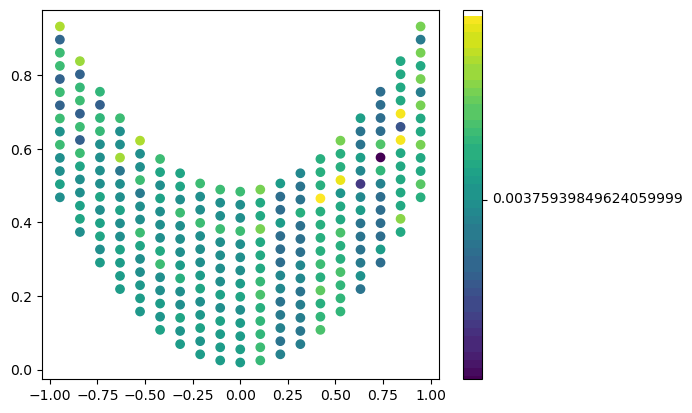

In [18]:
def triangle_area_2d(a, b, c):
    u = np.array(b) - np.array(a)
    v = np.array(c) - np.array(a)
    return 0.5 * abs(u[0]*v[1] - u[1]*v[0])
p1 = [xx[0:-1,0:-1],yy[0:-1,0:-1]]
p2 = [xx[1:,0:-1],yy[1:,0:-1]] 
p3 = [xx[0:-1,1:],yy[0:-1,1:]] 
p4 = [xx[1:,1:],yy[1:,1:]]
areas = triangle_area_2d(p1,p2,p3 ) + triangle_area_2d(p1, p3, p4)


midpoint_tempx = (xx[1:,:]+xx[0:-1,:])/2
midpointxx = (midpoint_tempx[:,1:]+midpoint_tempx[:,0:-1])/2
midpoint_tempy = (yy[1:,:]+yy[0:-1,:])/2
midpointyy = (midpoint_tempy[:,1:]+midpoint_tempy[:,0:-1])/2
plt.scatter(midpointxx,midpointyy,c=areas)
plt.colorbar()
plt.show()
